## Recognising Texts using Tensorflow

## Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/my-data2/my_image_data2.csv
/kaggle/input/samplesss/samples.csv
/kaggle/input/samplee/samples (1).csv
/kaggle/input/capital/capital_samples.csv
/kaggle/input/this-is-my-image/my_image_data.csv
/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input

# Dataset

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

2024-04-28 15:35:52.565845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 15:35:52.565959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 15:35:52.694169: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import pandas as pd

num_columns = 785

# Create column names
columns = ['label'] + list(range(1, num_columns))

# Read the training and testing datasets
ds_train = pd.read_csv("/kaggle/input/emnist/emnist-byclass-train.csv", header=None)
ds_test = pd.read_csv("/kaggle/input/emnist/emnist-byclass-test.csv", header=None)

# Assign column names to the DataFrames
ds_train.columns = columns
ds_test.columns = columns

# Reset index
ds_train = ds_train.reset_index(drop=True)
ds_test = ds_test.reset_index(drop=True)

# Extract features and labels
x_train = ds_train.drop(['label'], axis=1)
y_train = ds_train['label']
x_test = ds_test.drop(['label'], axis=1)
y_test = ds_test['label']

# Display the first few rows of the DataFrame
print(ds_train.head())
print(ds_test.head())


   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     35  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     36  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      6  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4     22  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

   782  783  784  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 785 columns]
   label  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  \
0     18  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     36  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0 

# The 62 classes , mapped to actual values

In [5]:
alpha_num_to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

show random Example :

**To print image of any letter in training data**

In [6]:
def show_example(n) :
    label = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    plt.title(label)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')
  
    plt.show()

**To print image of any letter with their actual letter and predicted letter**

In [7]:
def show_example_and_predicted_val(n,predicted_n) :

    true_val = alpha_num_to_char[ds_train.iloc[n,0]]  # the example's label
    predicted_val = alpha_num_to_char[predicted_n]  # the example's label
    
    plt.title("Actual val : "+ true_val+"\n Predicted :" + predicted_val)
    example = np.array(x_train.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')
  
    plt.show()

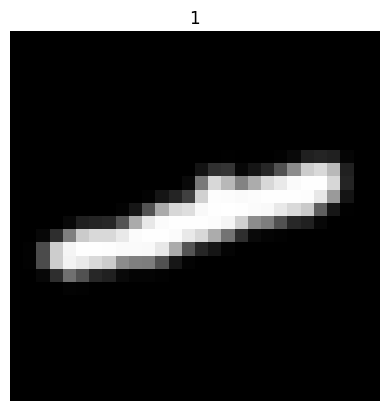

In [8]:
show_example(50)


# preprocessing using a pipeline

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Reshapes every image i.e pixels into 28x28
class Reshaper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reshaped = X.reshape(-1, 28, 28, 1)
        return X_reshaped

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('reshaper', Reshaper())  # Step 2: Custom Reshaper
])


# Fit and transform the training data

x_train_processed = pipeline.fit_transform(x_train)
y_train_processed = np.eye(62)[y_train.astype(int)]

x_test_processed = pipeline.transform(x_test)

y_test_processed = np.eye(62)[y_test.astype(int)]

In [10]:
print('input shape',x_train_processed.shape)
print('output shape',y_train.shape)
# y_train = np.eye(62)[y_train.astype(int)]
print('output shape',y_train_processed.shape)


input shape (697932, 28, 28, 1)
output shape (697932,)
output shape (697932, 62)


## CNN, since we have only 1 channel (grayscaled images) we can implement our model as a sequential model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

#  multiple model architectures
models = []
input_shape=(28,28,1)


model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

#model.add(Conv2D(filters=64 ,kernel_size=(3,3), activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(128,activation='relu'))
model.add(Dense(62,activation='softmax'))
model.add(Dense(62, activation='softmax'))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Training

In [61]:
# Train each model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train_processed, y_train_processed, epochs=5, batch_size=32)

Epoch 1/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.8070 - loss: 0.6372
Epoch 2/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8203 - loss: 0.5722
Epoch 3/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.8240 - loss: 0.5516
Epoch 4/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8266 - loss: 0.5374
Epoch 5/5
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.8300 - loss: 0.5240


## Model accuracy

In [62]:
# Evaluate each model
loss, accuracy = model.evaluate(x_test_processed, y_test_processed)
print(f"Model  Accuracy: {accuracy}")

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8412 - loss: 0.4795
Model  Accuracy: 0.8410460352897644


W0000 00:00:1714320176.675498      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


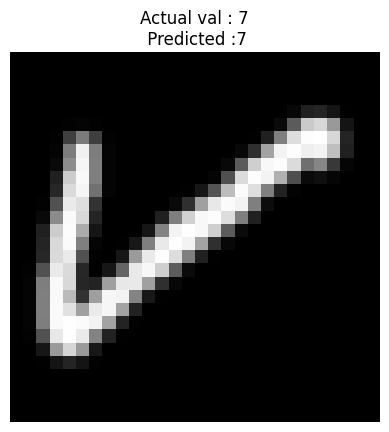

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


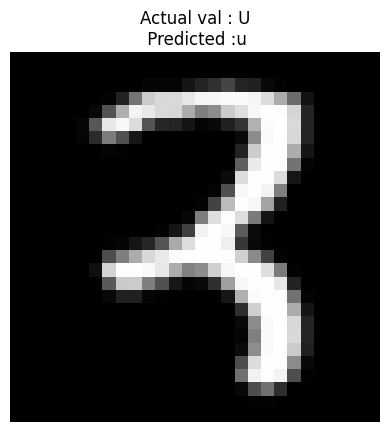

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


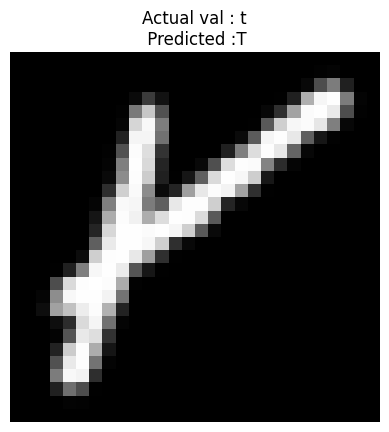

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


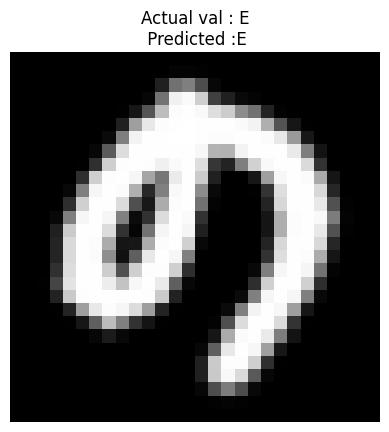

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


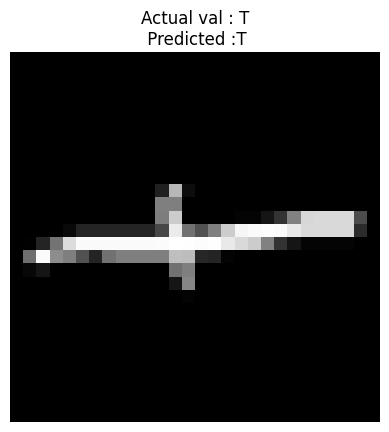

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


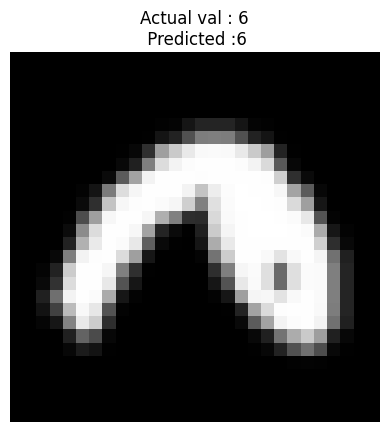

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


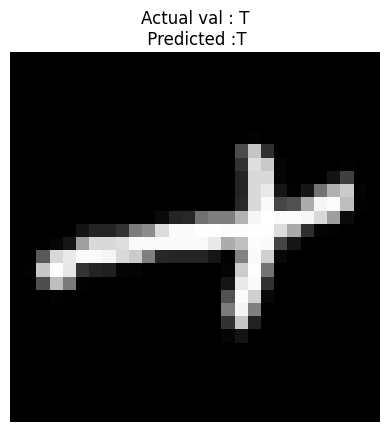

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


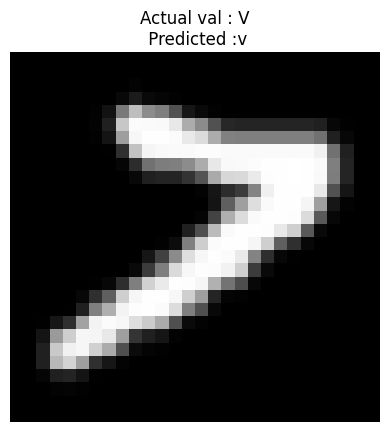

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


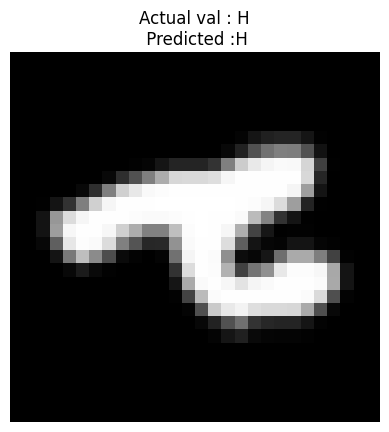

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


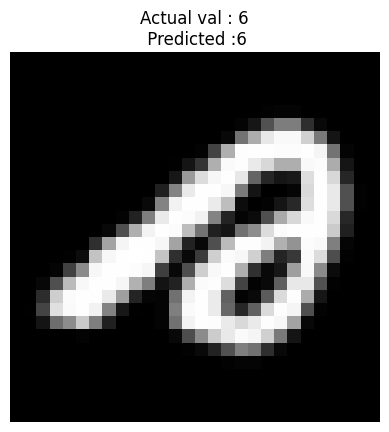

In [63]:
# some example from the data set
x=61
for i in range(10,20):
    example0=np.argmax(model.predict(x_train_processed[i].reshape(1,28,28,1)).flatten())
    alpha_num_to_char[example0]
    show_example_and_predicted_val(i,example0)

Accuracy on the test data

## Mydata

In [64]:
mydata=pd.read_csv('/kaggle/input/capital/capital_samples.csv')

## Preprocessing of my data

In [65]:
# Reset index
mydata = mydata.reset_index(drop=True)

In [66]:
# Extract features and labels
mydata_xtrain = mydata.drop(['label'],axis =1)
mydata_ytrain = mydata['label']

mydata_xtest = mydata.drop(['label'],axis =1)
mydata_ytest = mydata['label']

In [67]:
class Reshaper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_reshaped = X.reshape(-1, 28, 28, 1)
        return X_reshaped

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler
    ('reshaper', Reshaper())  # Step 2: Custom Reshaper
])


# Fit and transform the training data

mydata_xtrain_processed = pipeline.fit_transform(mydata_xtrain)
mydata_ytrain_processed = np.eye(62)[mydata_ytrain.astype(int)]

mydata_xtest_processed = pipeline.fit_transform(mydata_xtest)
mydata_ytest_processed = np.eye(62)[mydata_ytest.astype(int)]

In [68]:
print('input shape',mydata_xtrain_processed.shape)
print('output shape',mydata_ytrain.shape)
# y_train = np.eye(62)[y_train.astype(int)]
print('output shape',mydata_ytrain_processed.shape)

input shape (26, 28, 28, 1)
output shape (26,)
output shape (26, 62)


## Fitting the model with my data

In [76]:
history2 = model.fit(mydata_xtrain_processed,mydata_ytrain_processed,epochs = 9,batch_size=32,validation_data=(mydata_xtest_processed,mydata_ytest_processed))

# Evaluate the model
test_loss, test_acc = model.evaluate(mydata_xtest_processed, mydata_ytest_processed)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2692 - loss: 2.4023 - val_accuracy: 0.4231 - val_loss: 1.5245
Epoch 2/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3846 - loss: 2.2920 - val_accuracy: 0.4231 - val_loss: 1.4969
Epoch 3/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3846 - loss: 2.1511 - val_accuracy: 0.4231 - val_loss: 1.4602
Epoch 4/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3846 - loss: 1.7557 - val_accuracy: 0.4615 - val_loss: 1.4176
Epoch 5/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3846 - loss: 2.3449 - val_accuracy: 0.4615 - val_loss: 1.3957
Epoch 6/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 1.5748 - val_accuracy: 0.4615 - val_loss: 1.3675
Epoch 7/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4231 - loss: 1.7034 - val_accuracy: 0.4615 - val_loss: 1.3227
Epoch 8/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4615 - loss: 1.9700 - val_accuracy: 0.4615 - val_loss: 1.2834
Epoch 9/

## Fitting the model with augumented data

**Data augumentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    shear_range=0.25,        # Shear transformation (skewing) with a maximum shear intensity of 20%
    zoom_range=0.2,         # Zoom in/out on images by up to 20%
    horizontal_flip=True,   # Flip images horizontally (left/right)
    vertical_flip=False,    # Don't flip images vertically (up/down)
    fill_mode='nearest'     # Fill in missing pixels after rotation or shift
)

# Load and preprocess your dataset (x_train and y_train)

# Fit the ImageDataGenerator to your training data
datagen.fit(mydata_xtrain_processed)

# Visualize some augmented images
import matplotlib.pyplot as plt

# Visualize some augmented images
plt.figure(figsize=(10, 10))
num_batches = 4  # Generate 3 batches of augmented data
for batch_index, (X_batch, y_batch) in enumerate(datagen.flow(mydata_xtrain_processed, mydata_ytrain_processed, batch_size=26)):
    for i in range(0, 8):  # Display 8 images from each batch
        plt.subplot(num_batches, 8, batch_index * 8 + i + 1)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    if batch_index == num_batches - 1:
        break  # Stop after generating the desired number of batches
plt.show()

**Training**

In [98]:
# Train the model using augmented data
history3 = model.fit(X_batch,y_batch,batch_size=32,steps_per_epoch=int(len(X_batch) / 32),  epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8462 - loss: 0.5576
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9231 - loss: 0.5035
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9231 - loss: 0.4305
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9231 - loss: 0.4754
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8462 - loss: 0.5983
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8846 - loss: 0.7074
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8462 - loss: 0.5703
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8846 - loss: 0.5674
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9231 - loss: 0.4985
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9615 - loss: 0.4579


## To display images of my data with their actual letter and predicted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


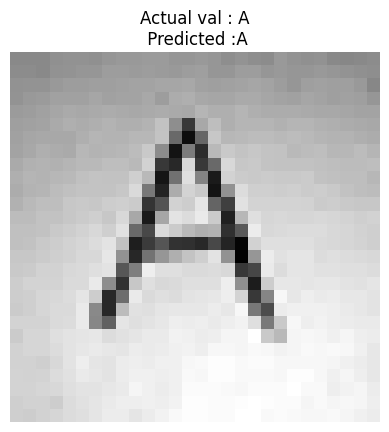

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


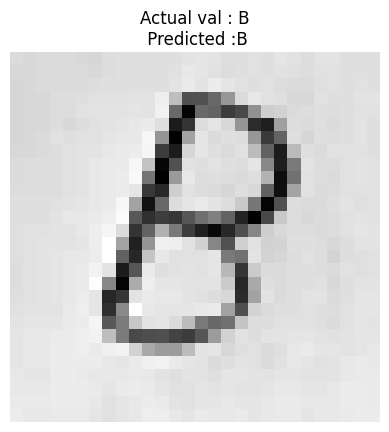

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


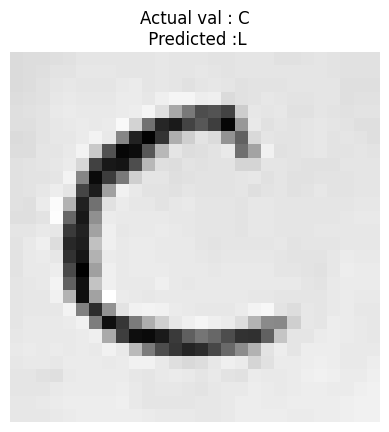

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


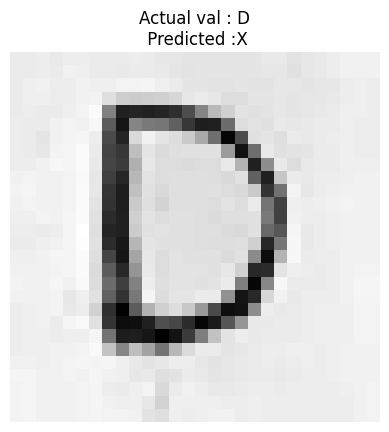

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


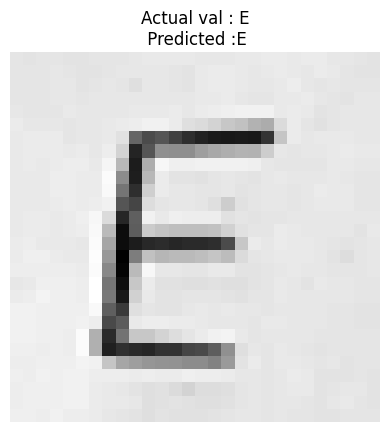

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


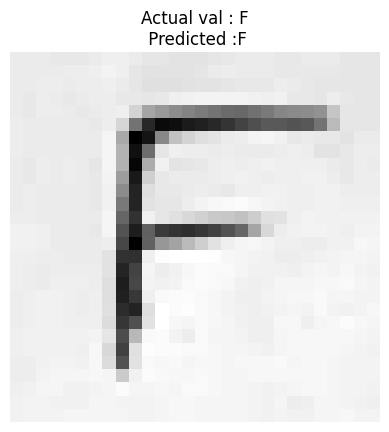

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


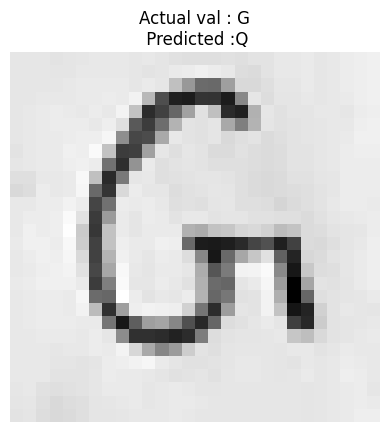

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


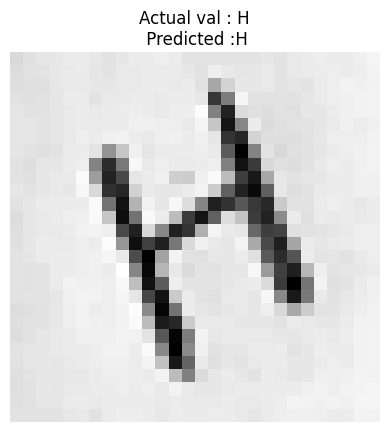

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


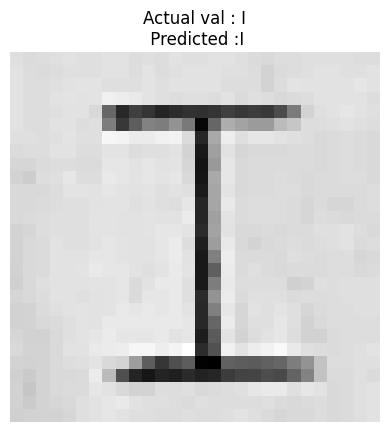

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


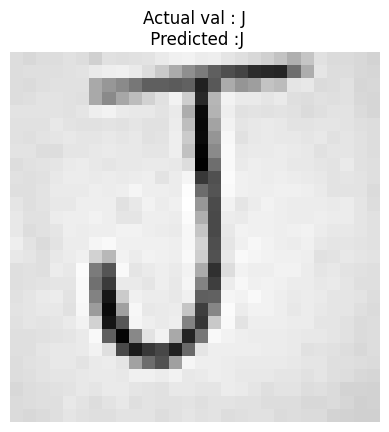

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


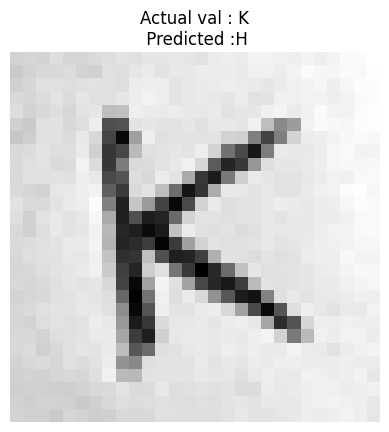

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


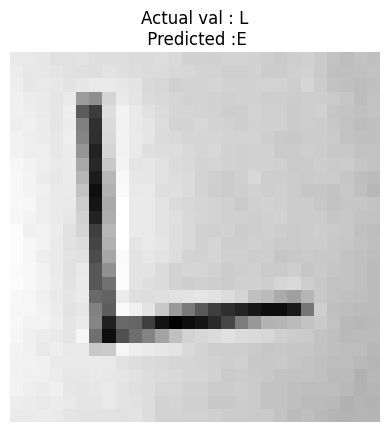

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


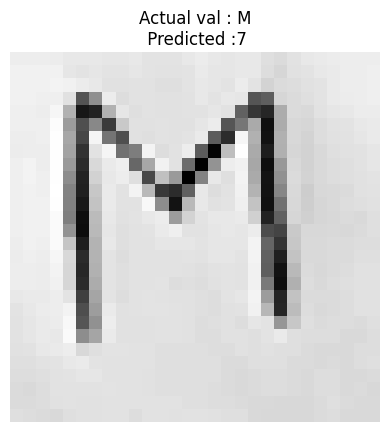

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


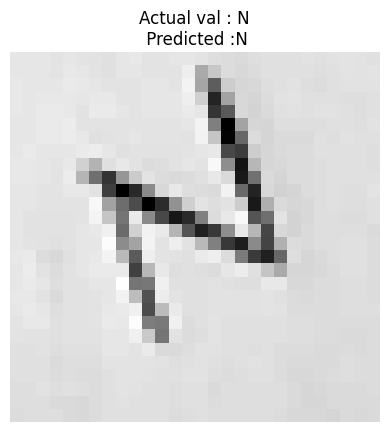

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


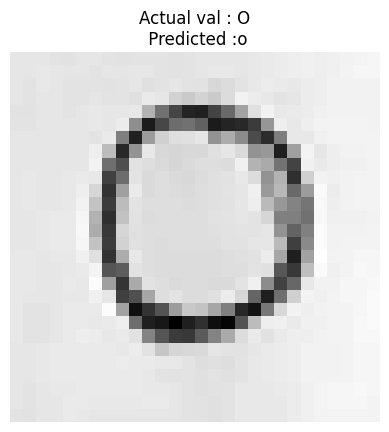

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


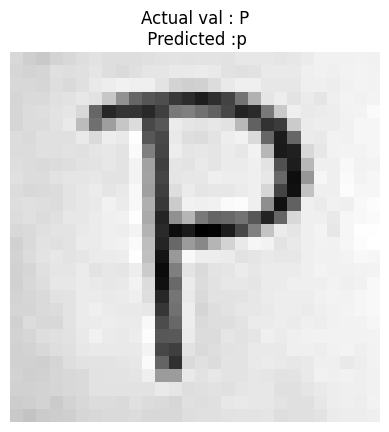

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


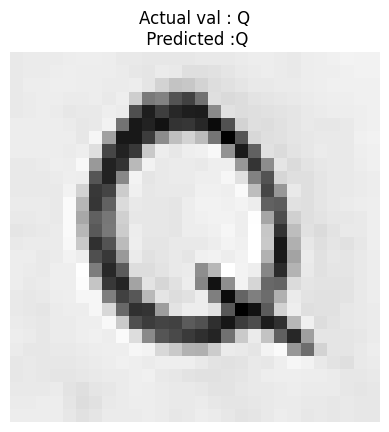

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


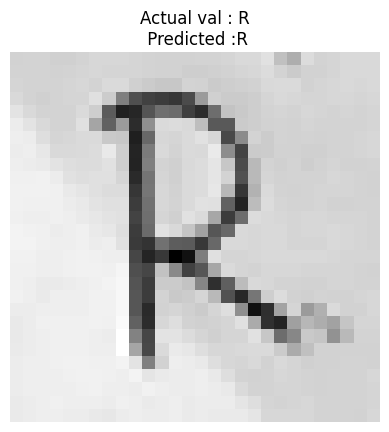

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


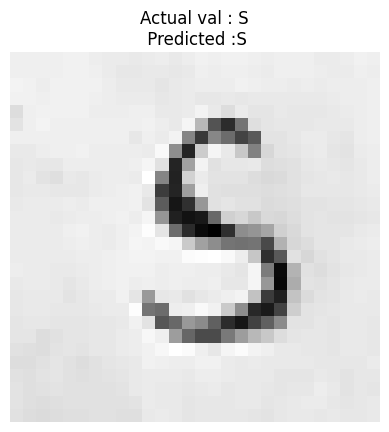

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


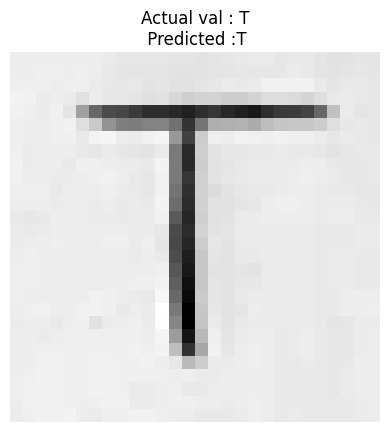

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


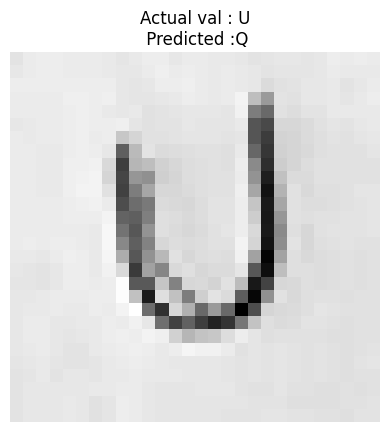

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


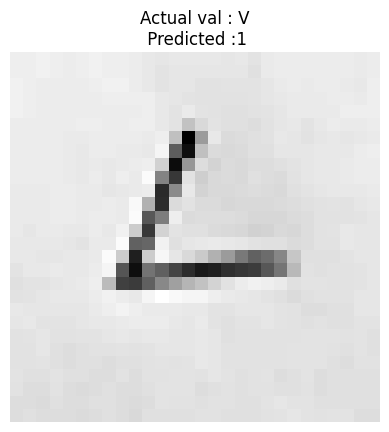

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


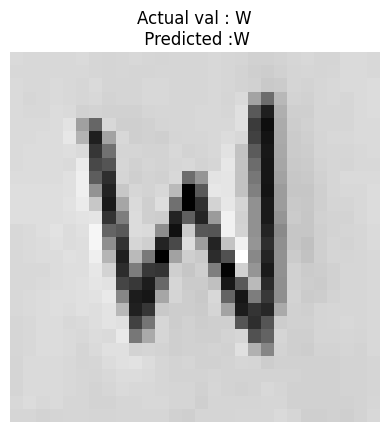

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


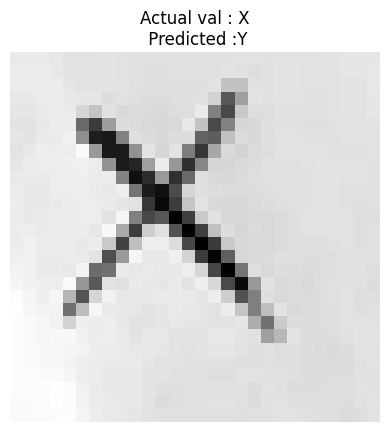

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


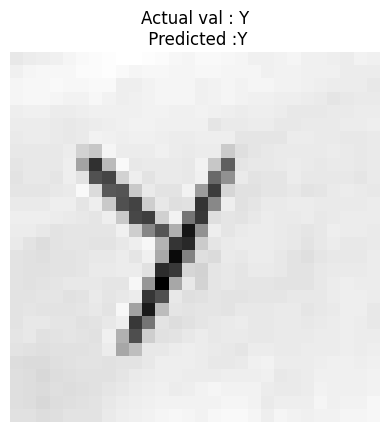

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


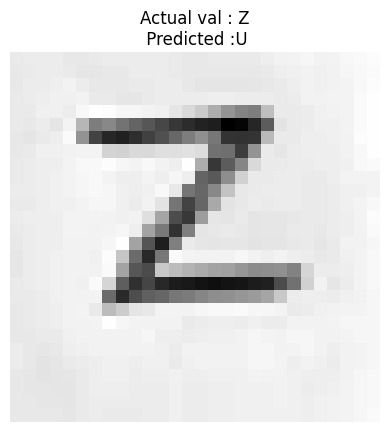

In [99]:
def show_example_and_predicted_val_mydata(n,predicted_n) :

    true_val = alpha_num_to_char[mydata.iloc[n,0]]  # the example's label
    predicted_val = alpha_num_to_char[predicted_n]  # the example's label
    
    plt.title("Actual val : "+ true_val+"\n Predicted :" + predicted_val)
    example = np.array(mydata_xtrain.iloc[n]) # extract the 28 *28 array that contains the pixels
    example_image = example.reshape(28 , 28 ) # rearrange the array to be a 28 by 28 matrix ,that represents that actual image
    plt.imshow(example_image , cmap ='gray')
    plt.axis('off')
  
    plt.show()

# some example from the data set
for i in range(0,26):
    #plt.subplot(num_batches, 26, batch_index * 26 + i + 1)
    example0=np.argmax(model.predict(mydata_xtrain_processed[i].reshape(1,28,28,1)).flatten())
    alpha_num_to_char[example0]
    show_example_and_predicted_val_mydata(i,example0)

In [100]:
# Evaluate each model
loss, accuracy = model.evaluate(mydata_xtest_processed, mydata_ytest_processed)
print(f"Model  Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5385 - loss: 1.4623
Model  Accuracy: 0.5384615659713745


## Conlusion

**Thus the model detects the alphabetical letter and predict it using tensorflow model.Here the model is trained under capital alphabets which gave an accuracy of 84%.The model could be improved using more handwritten training data(versatality in dataset i.e uppercase,lowercase,digits and special characters).**